In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

In [75]:
df_prime = pd.read_csv('Datasets/8_Final_dataset_3.0.csv')

In [76]:
df = pd.read_csv('Datasets/8_Final_dataset_3.0.csv')

In [77]:
def fn(x):
    if(x==1):
        return 'positive'
    else:
        return 'negative'
        

df['Sentiment']=df['Sentiment'].apply(lambda x: fn(x))

In [78]:
df

,Review,Sentiment
0,हीरो डबल रोल वाली फिल्में पिछले अरसे कईं रिलीज...,positive
1,होम फिल्म समीक्षा अक्षय बिना अधूरी सी वेलकम बै...,negative
2,'मैं मां हूं मां कोई सपने होते।' अश्विनी अय्यर...,positive
3,चंद्रमोहन शर्मा आमतौर दिवाली पहले वीक ऐसी फिल्...,negative
4,"-अजय ब्रह्मात्मज कलाकार: नीलिमा अजीम, ईशान कौर...",positive
...,...,...
1709,"रेटिंगः 2 स्टारकलाकारः मनीष पॉल, पीयूष मिश्र, ...",negative
1710,सारा मसला ख्वाहिशों है... फिल्म शुरुआत खिलजी ड...,positive
1711,चंद्रमोहन शर्मा यशराज कैंप फिल्म अस्सी-नब्बे द...,positive
1712,जेम्स वान मूल फिल्म असाधारण बनाया था। इसके बाद...,positive


In [79]:
notreq = ['|', '।', ',', '.', ':', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '\'', '?', '(', ')', '-', '_']

In [80]:
words = df['Review']
cleantext = []
for single in words:
    txt = ''
    for i in single:
        if(i not in notreq):
            txt += i
    cleantext.append(txt)
# print(cleantext[2])
allwords = []
for wordtext in cleantext:
    wordlist = wordtext.split(' ')
    for singleword in wordlist:
        allwords.append(singleword)
        


In [81]:
print(allwords[10])

हैं


In [82]:
mostcommon = FreqDist(allwords).most_common(100)

In [83]:
print(mostcommon)

[('है', 27362), ('फिल्म', 20575), ('हैं', 10047), ('', 6239), ('कहानी', 5225), ('लेकिन', 4502), ('अपने', 4450), ('कर', 3769), ('अपनी', 3553), ('किया', 3379), ('किरदार', 3198), ('बाद', 3152), ('करने', 2912), ('जाता', 2361), ('तरह', 2250), ('तक', 2103), ('गया', 2031), ('आपको', 2000), ('पहले', 1999), ('जाती', 1995), ('बात', 1927), ('बार', 1921), ('फिल्मों', 1907), ('करते', 1782), ('उसे', 1738), ('फिर', 1730), ('काम', 1686), ('खान', 1664), ('दिया', 1630), ('ज्यादा', 1555), ('दोनों', 1522), ('उन्होंने', 1521), ('कोई', 1521), ('नजर', 1517), ('कपूर', 1514), ('पूरी', 1508), ('वो', 1495), ('काफी', 1492), ('उसके', 1484), ('अगर', 1465), ('वहीं', 1454), ('किसी', 1452), ('बीच', 1415), ('रही', 1413), ('गई', 1393), ('बहुत', 1344), ('सिंह', 1320), ('सीन', 1313), ('लेकर', 1302), ('लगता', 1297), ('उसकी', 1294), ('होने', 1285), ('डायरेक्टर', 1268), ('रहा', 1254), ('प्यार', 1249), ('रोल', 1244), ('देखने', 1240), ('करती', 1231), ('दर्शकों', 1224), ('करता', 1223), ('हुए', 1212), ('कोशिश', 1177), ('बेहतरीन',

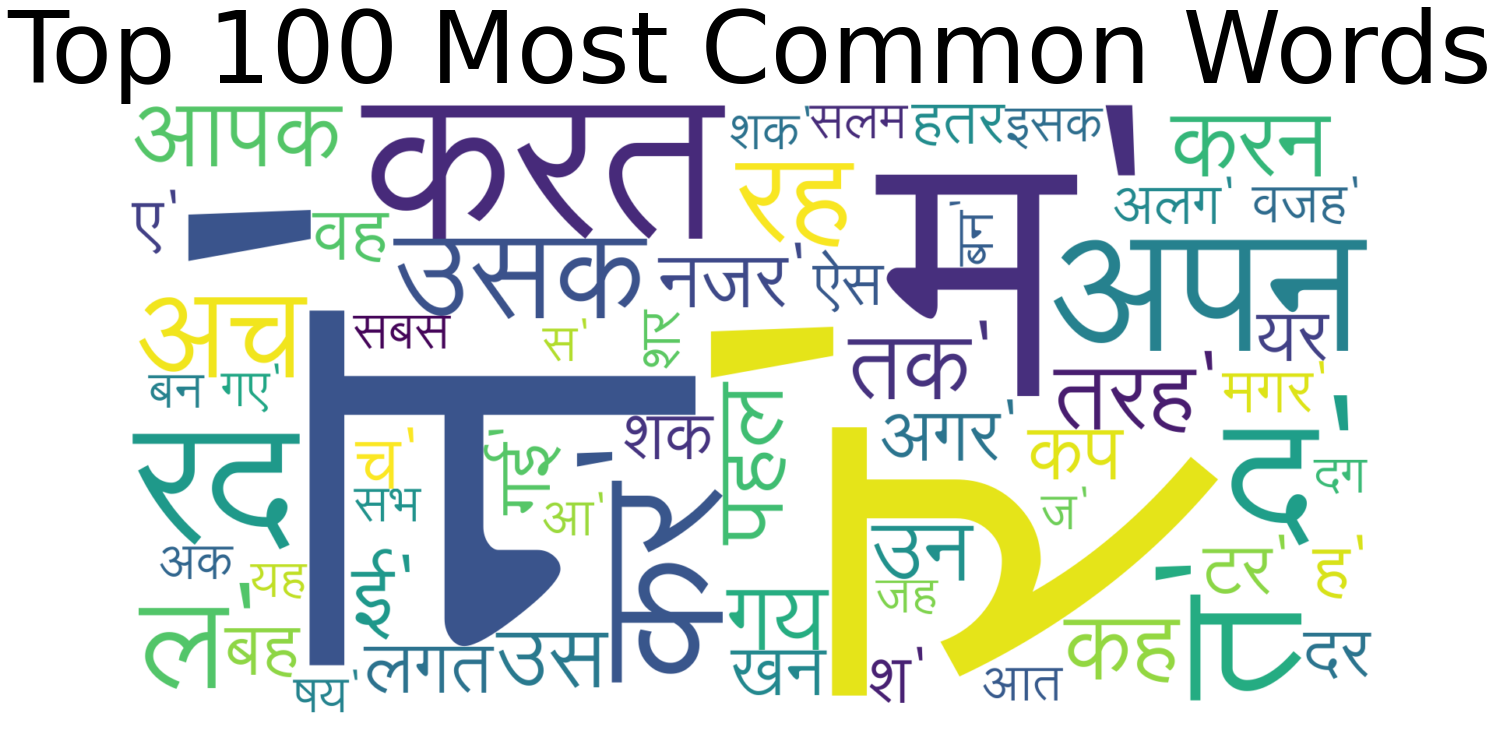

In [84]:
wordcloud = WordCloud(font_path='Lohit-Devanagari.ttf', width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

AttributeError: 'Text' object has no property 'font_path'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from curren

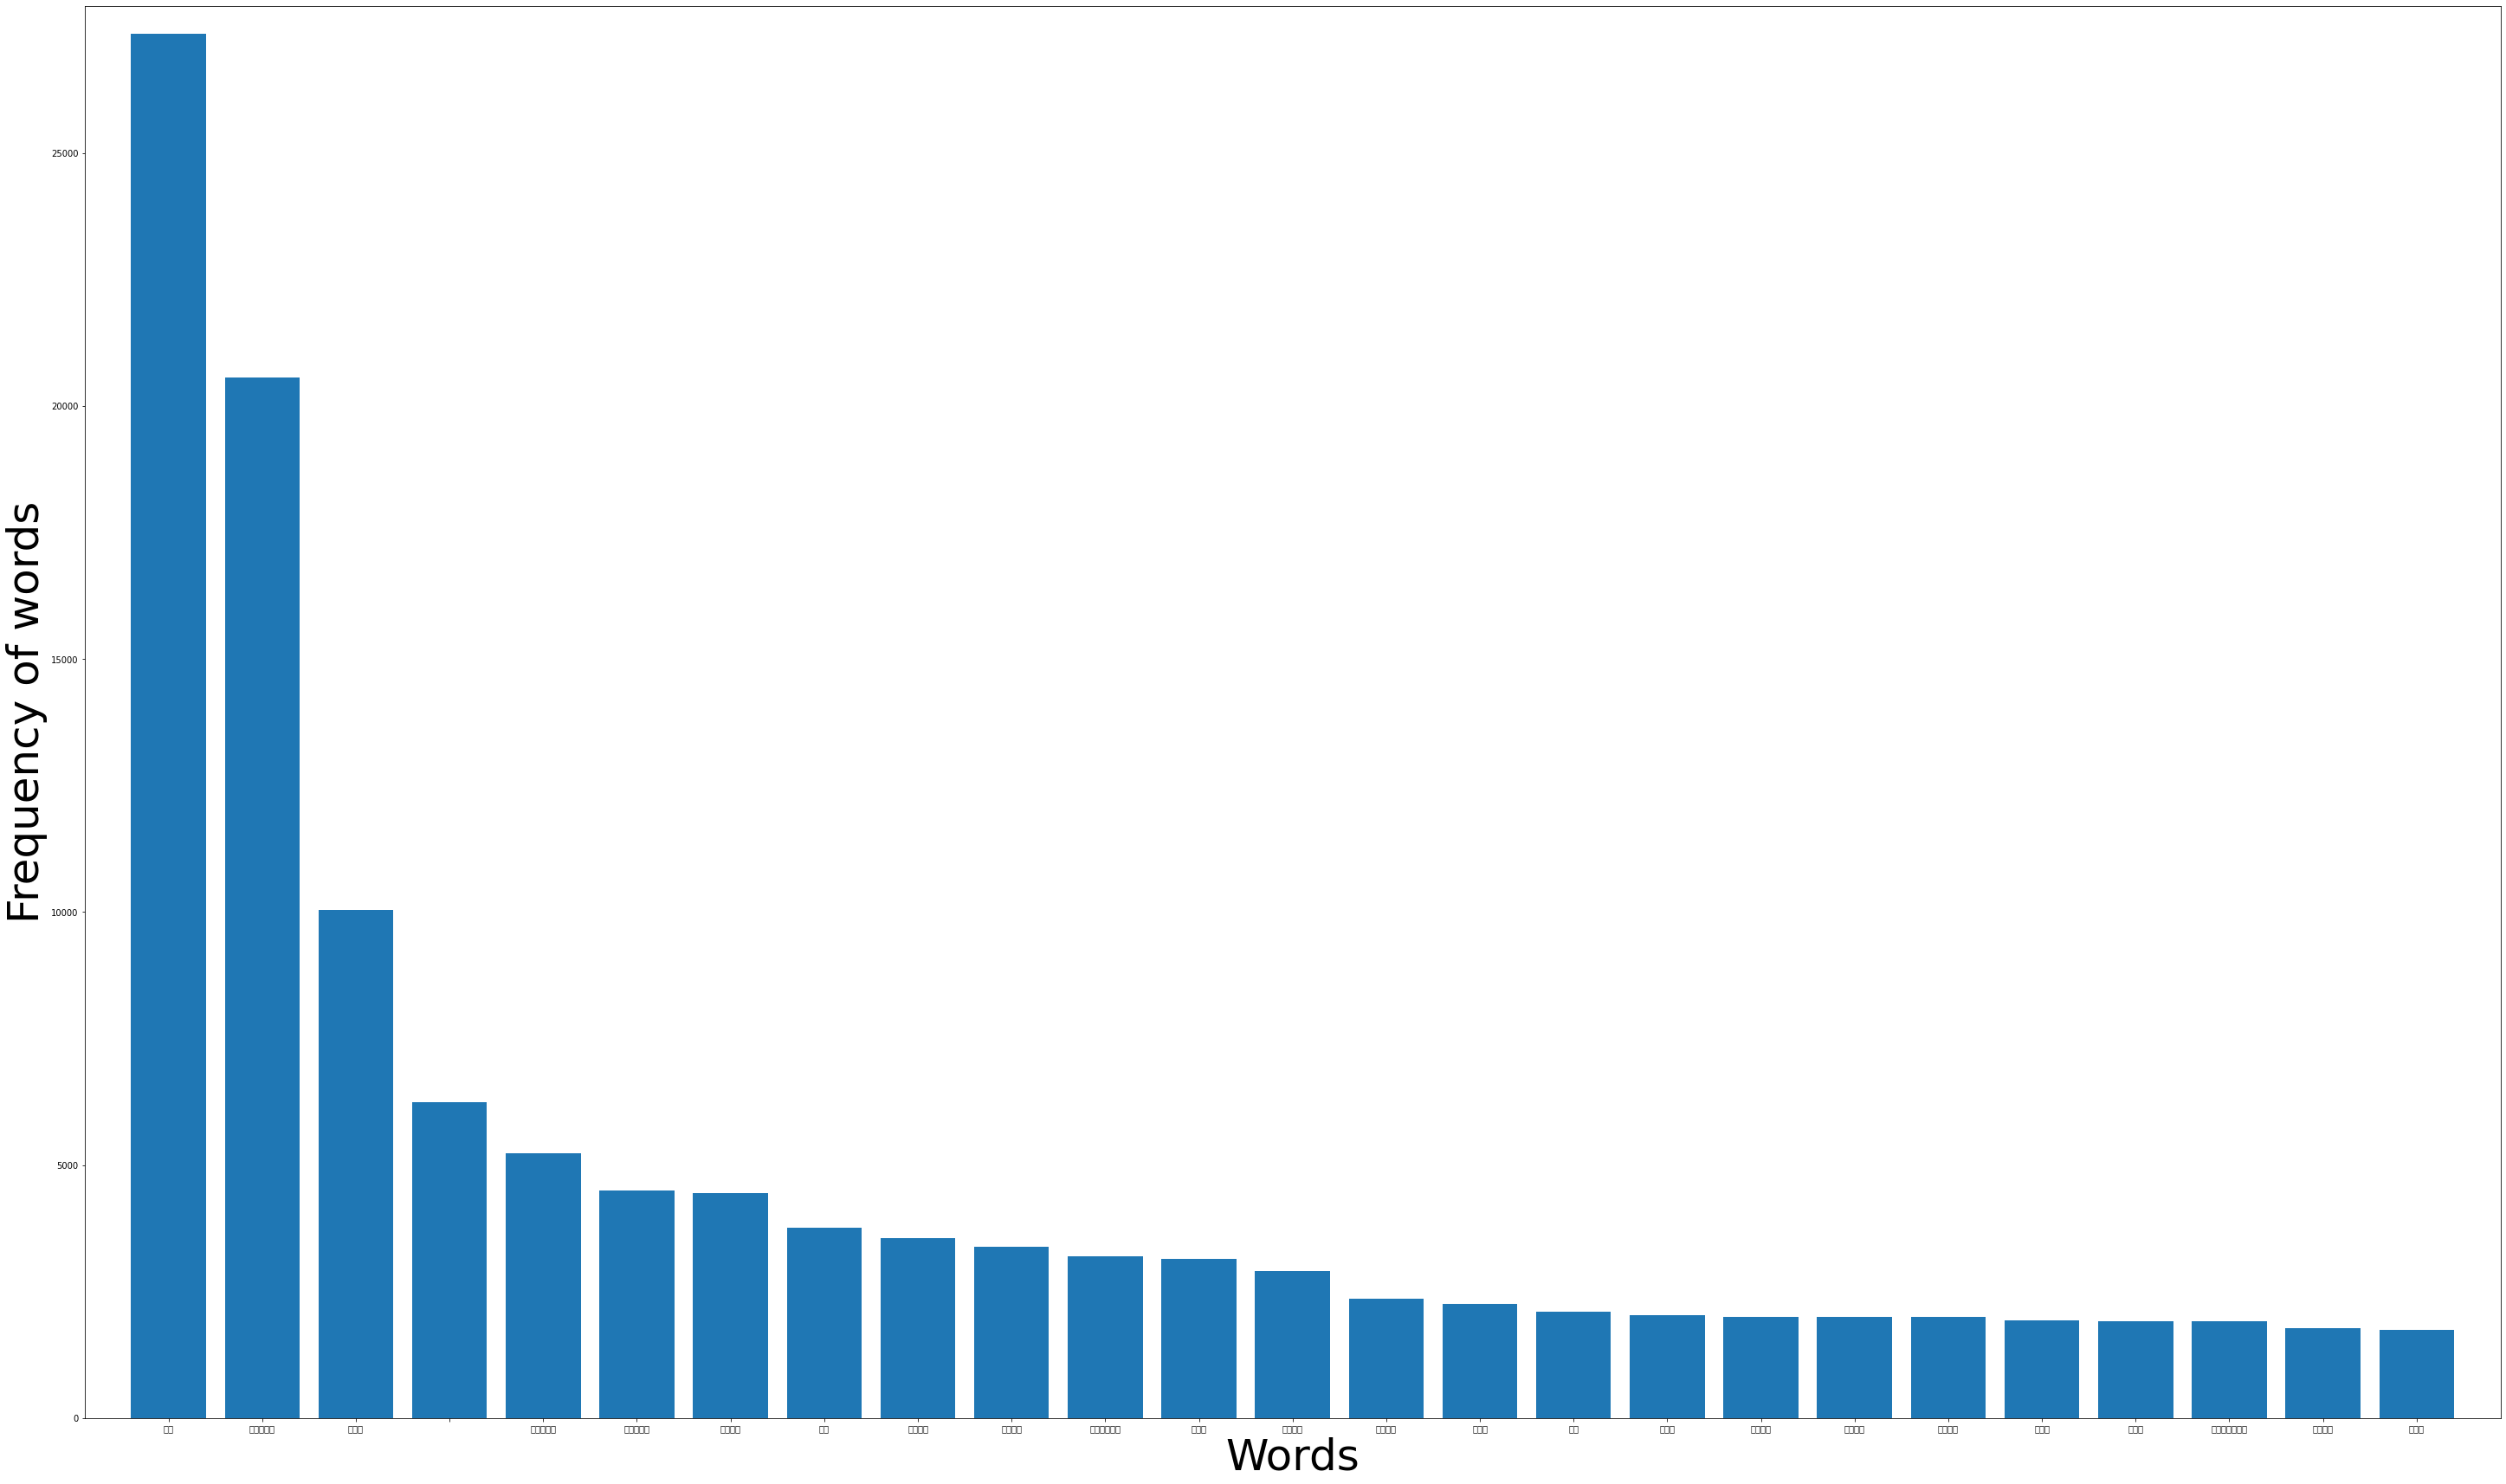

In [85]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
#create a figure
plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of words', fontsize=50)
plt.yticks(font_path='Lohit-Devanagari.ttf', fontsize=40)
plt.xticks(rotation=60, fontsize=60)
plt.title('Frequency of 25 most common words', fontsize=60)
plt.show()

In [86]:
group_by = df.groupby('Sentiment')['Review'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))

AttributeError: 'Text' object has no property 'font_path'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2404 missing from current font.
  font.set_text(s, 0, flags=flags)


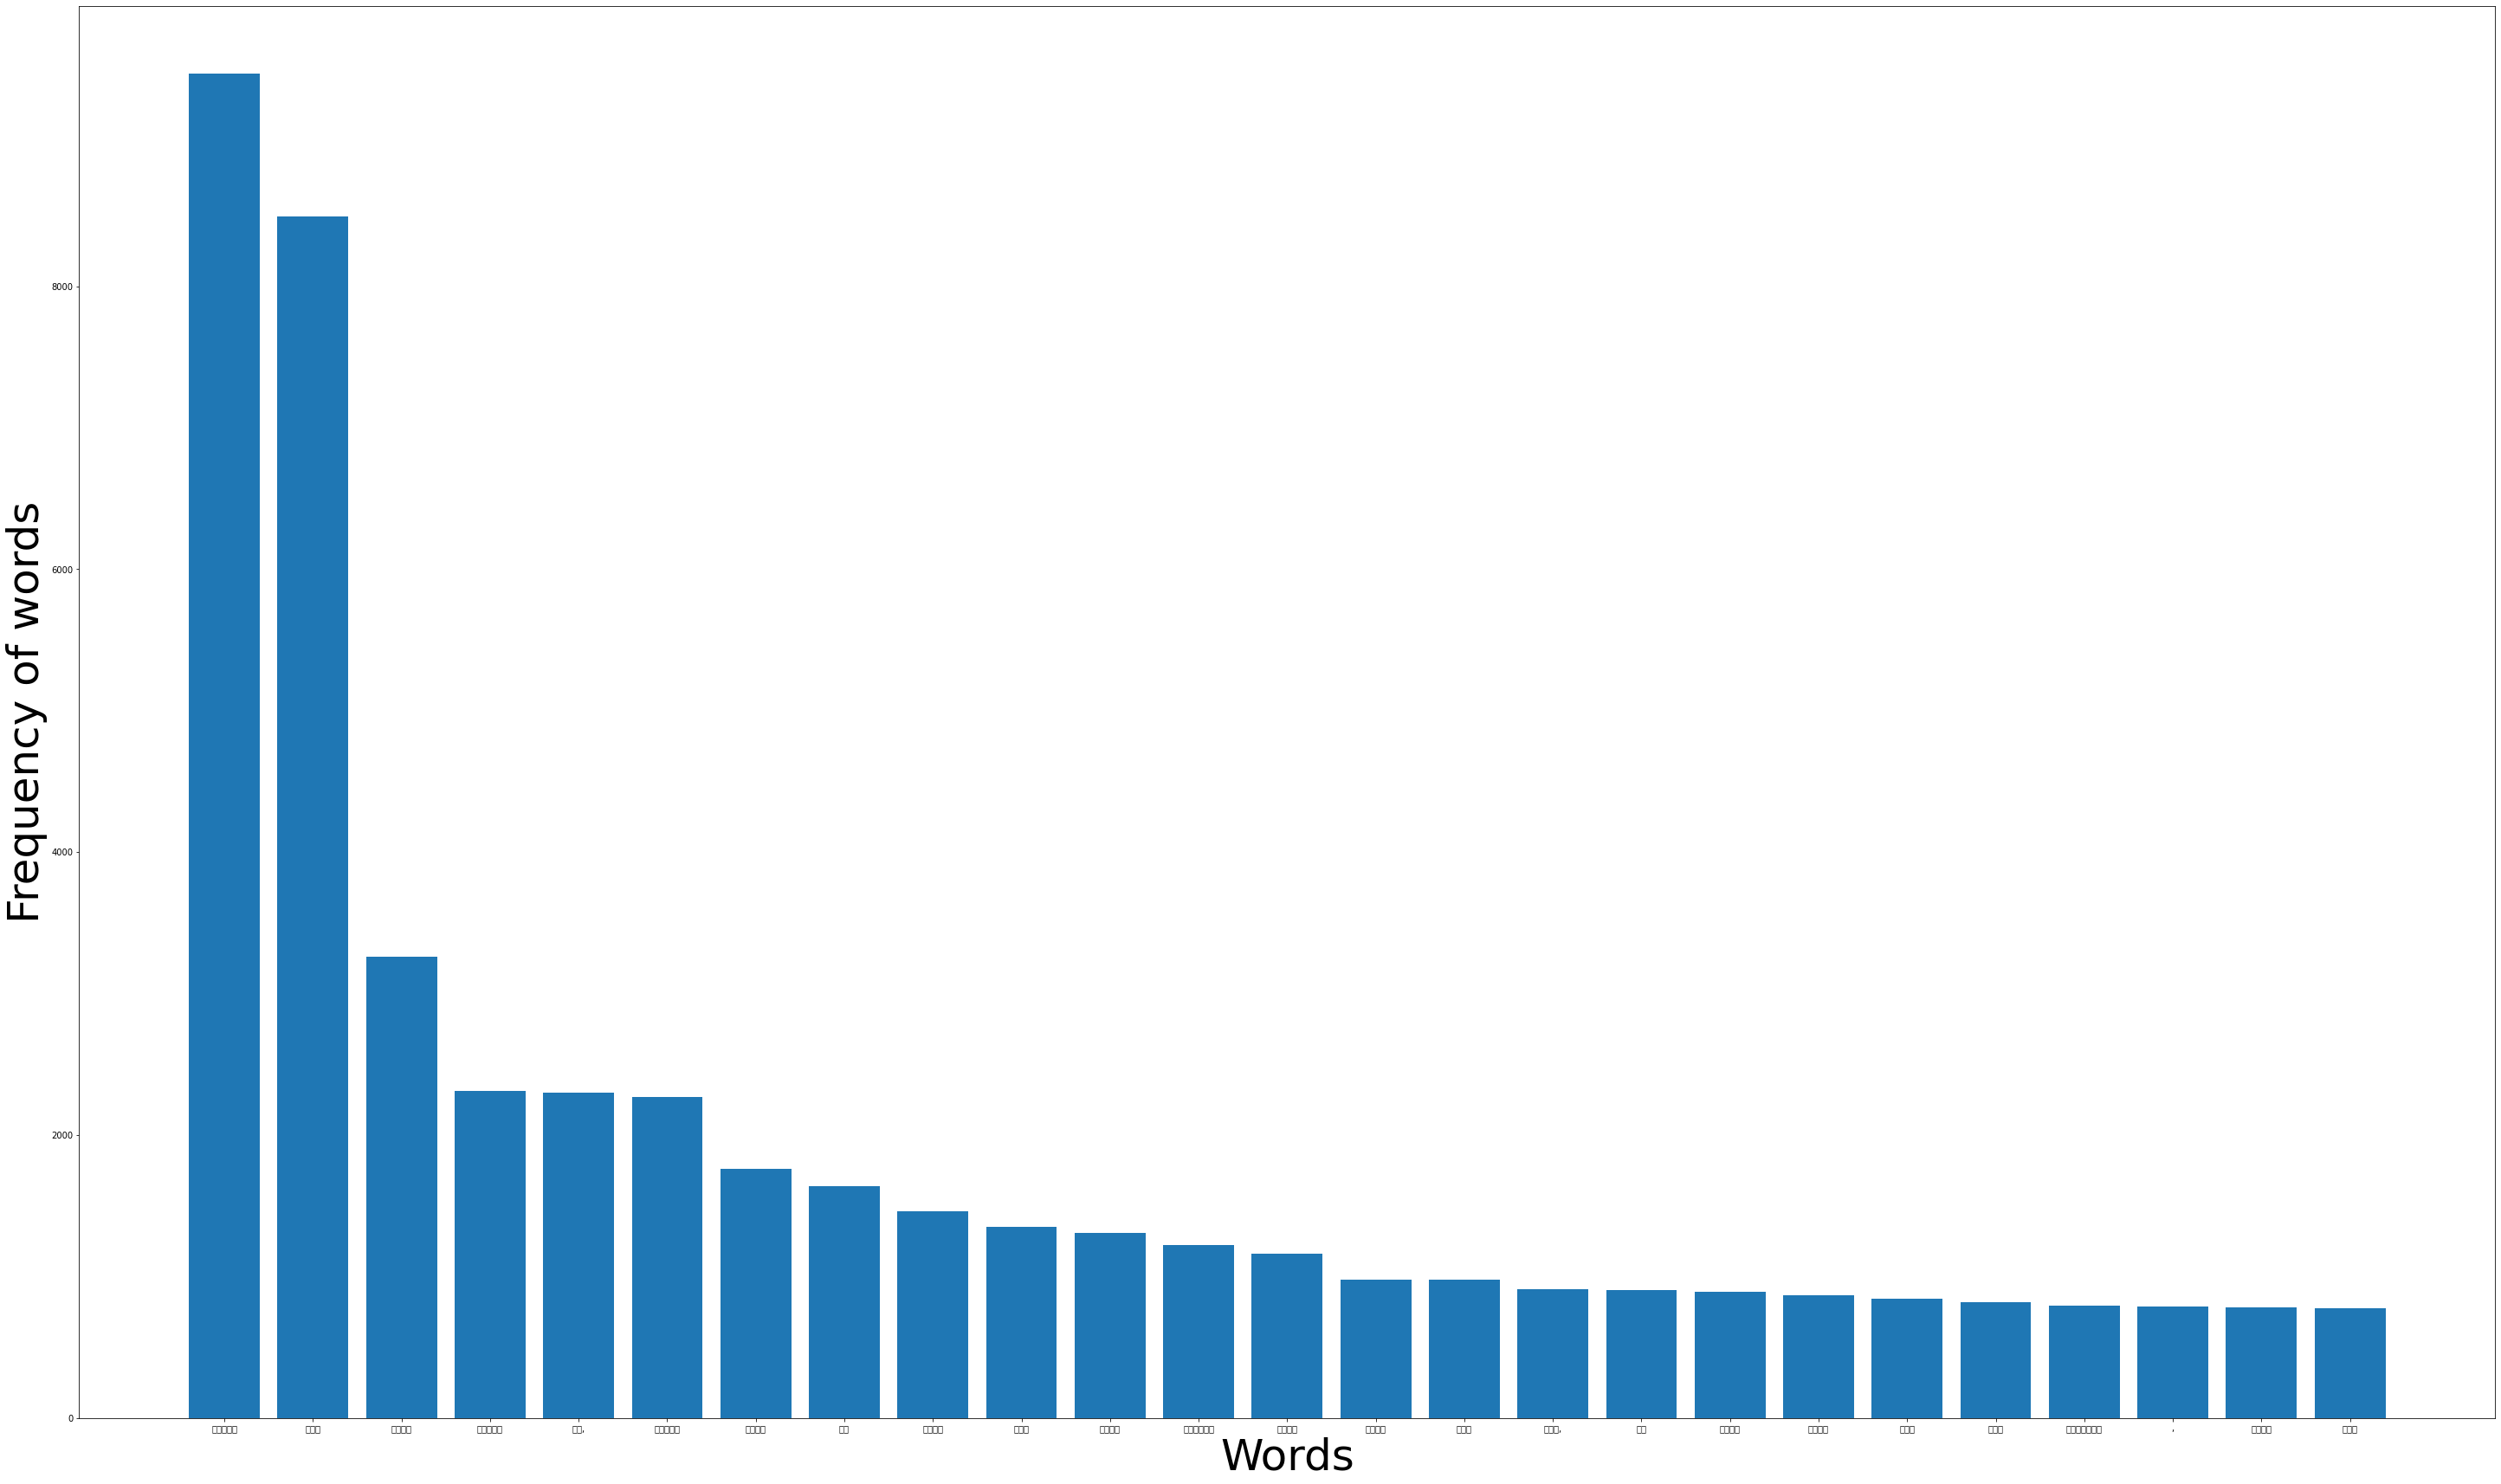

In [87]:
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]

plt.figure(figsize=(50, 30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of words', fontsize=50)
plt.yticks(font_path='Lohit-Devanagari.ttf', fontsize=40)
plt.xticks(rotation=60, fontsize=60)
plt.title('Frequency of 25 Most Common Words for Negative sentiment', fontsize=60)
plt.show()


AttributeError: 'Text' object has no property 'font_path'

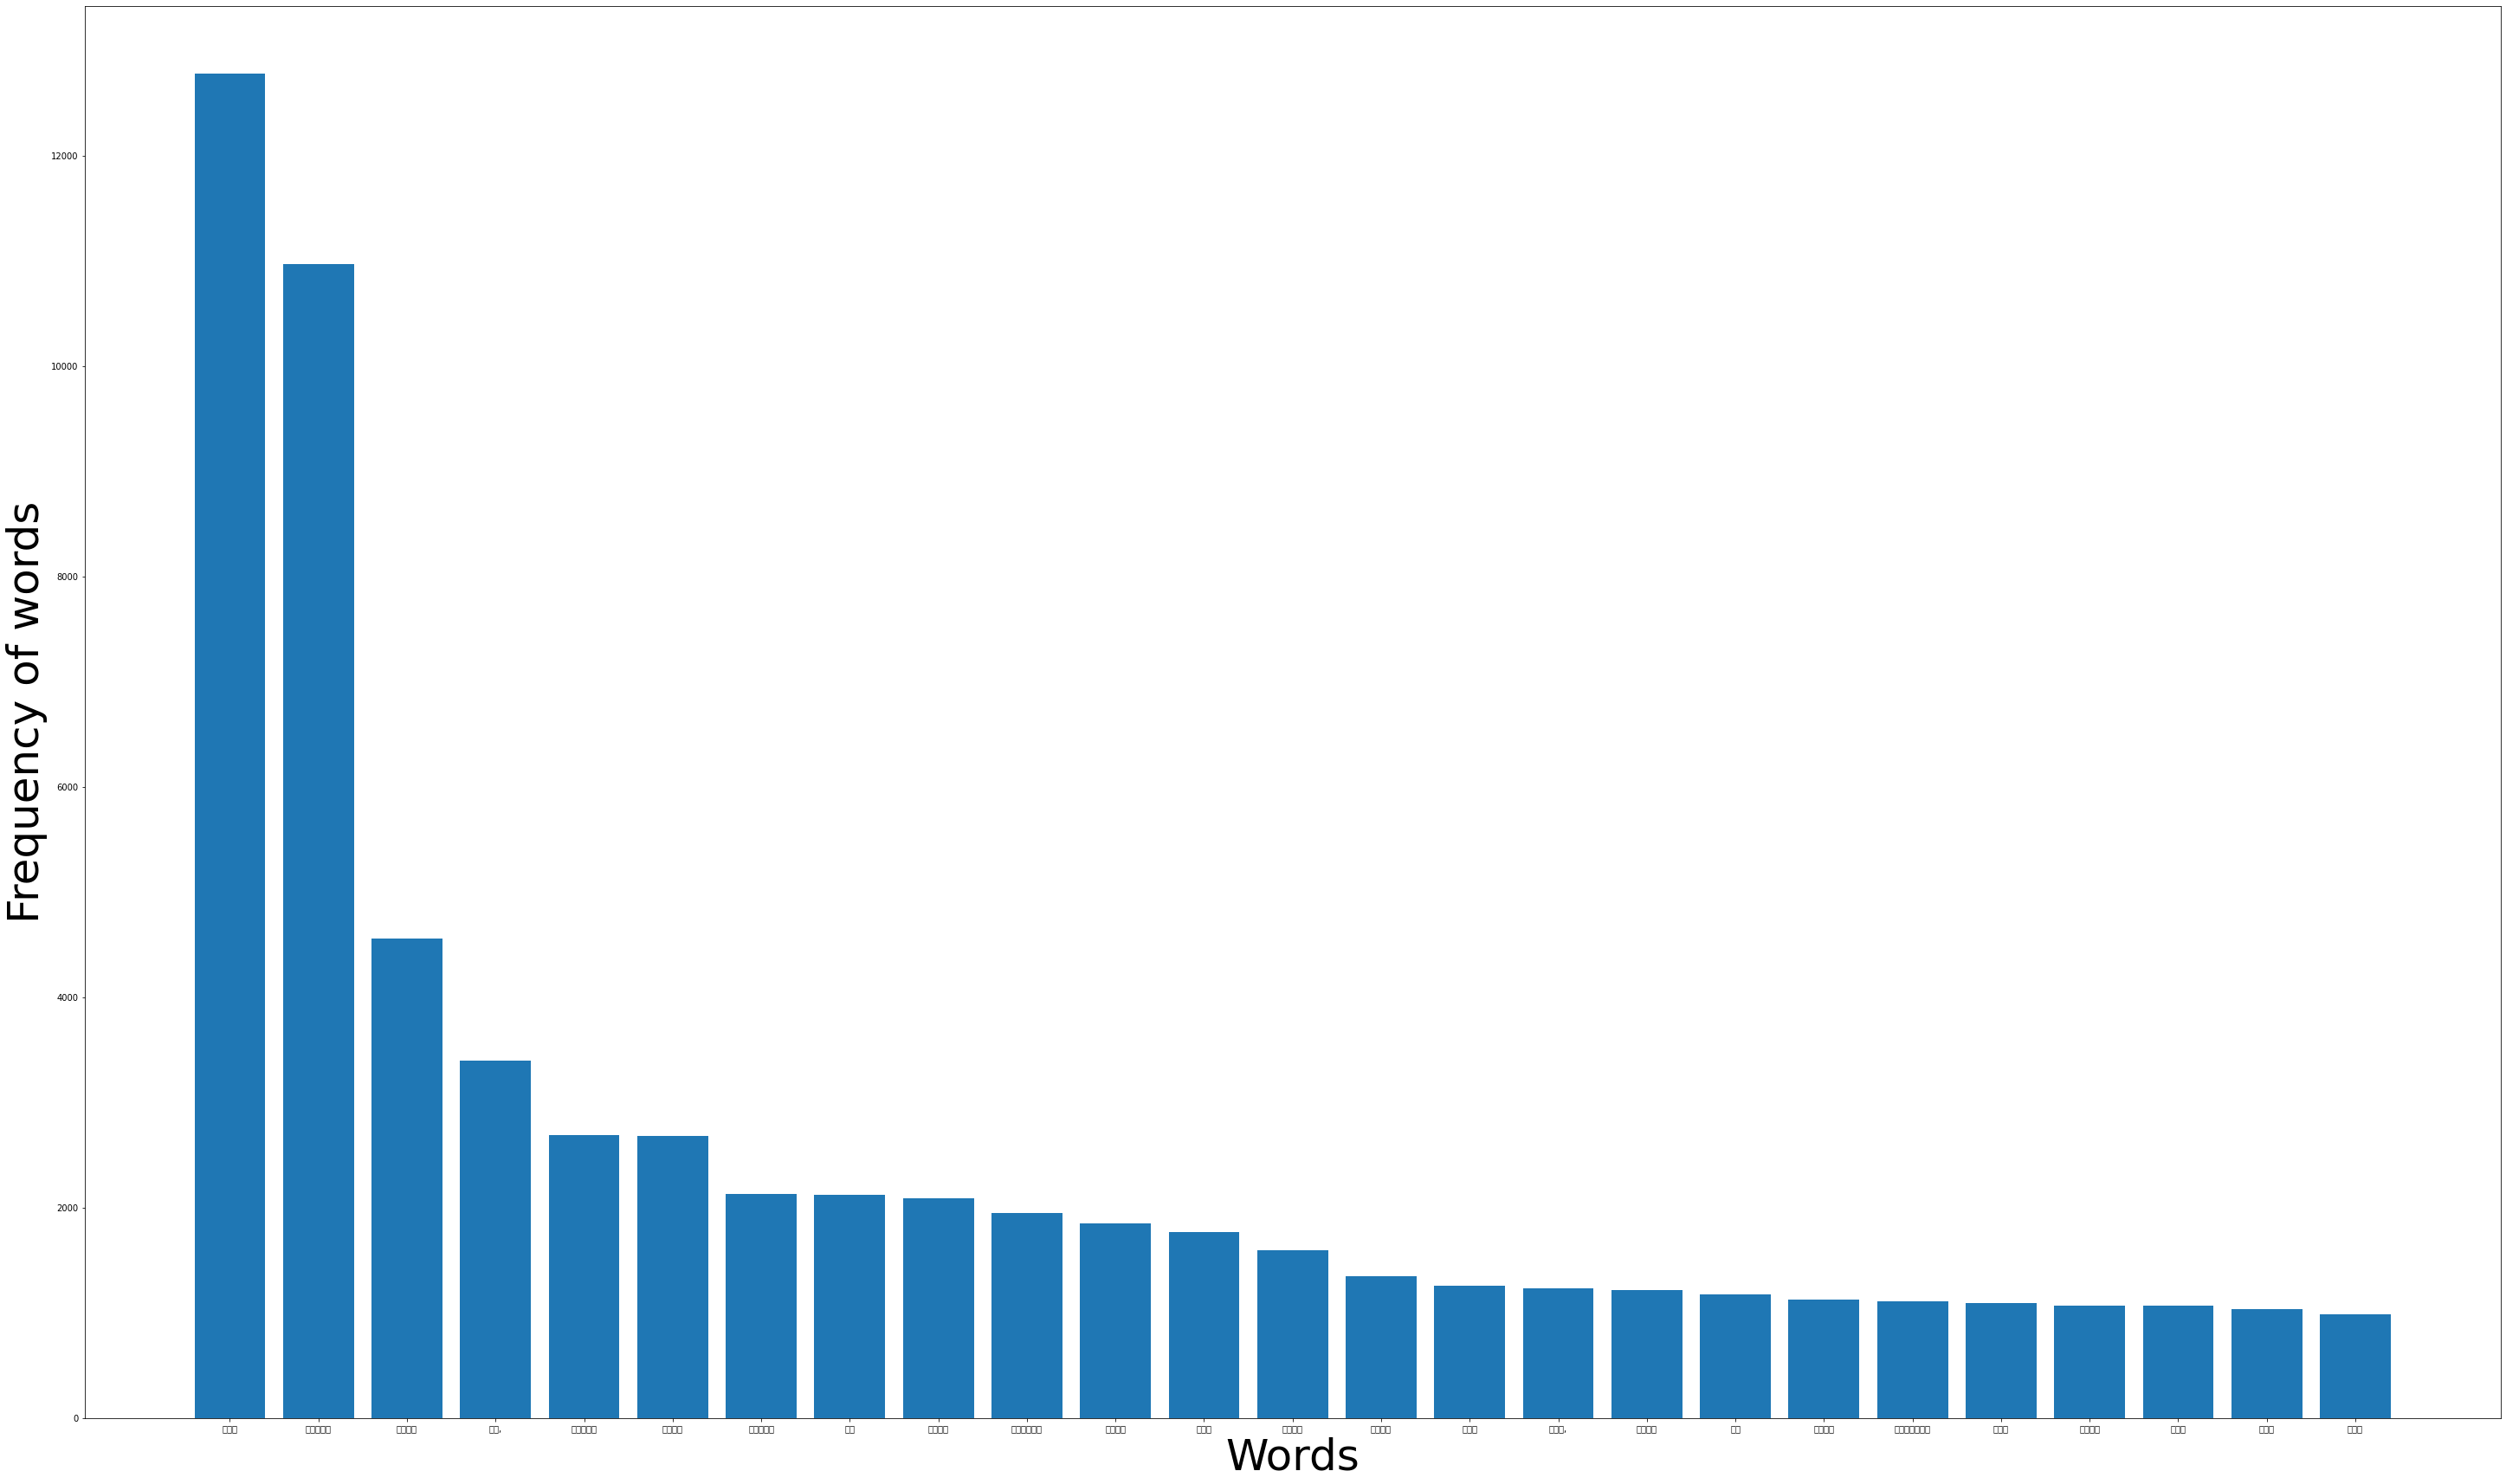

In [89]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]

plt.figure(figsize=(50, 30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of words', fontsize=50)
plt.yticks(font_path='Lohit-Devanagari.ttf', fontsize=40)
plt.xticks(rotation=60, fontsize=60)
plt.title('Frequency of 25 Most Common Words for Positive sentiment', fontsize=60)
plt.show()